# Scikit-learn library - a library for Machine learning in Python

In [1]:
# https://scikit-learn.org/stable/index.html

**Logistic regression classifier**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression. 

**Parameters (important for us):** fit_intercept, by default set to True; max_iter; solver and penalty (choose sth from supported values). 

**Attributes:** classes_, coef_, intercept_. 

**Methods:** fit, predict, predict_proba, score.

# Practical 4: Logistic Regression

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.pyplot.style.use = 'default'
import matplotlib.pyplot as plt

cm = plt.cm.RdBu
cm_bright = plt.cm.jet

df = pd.read_csv('advertising.csv')
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


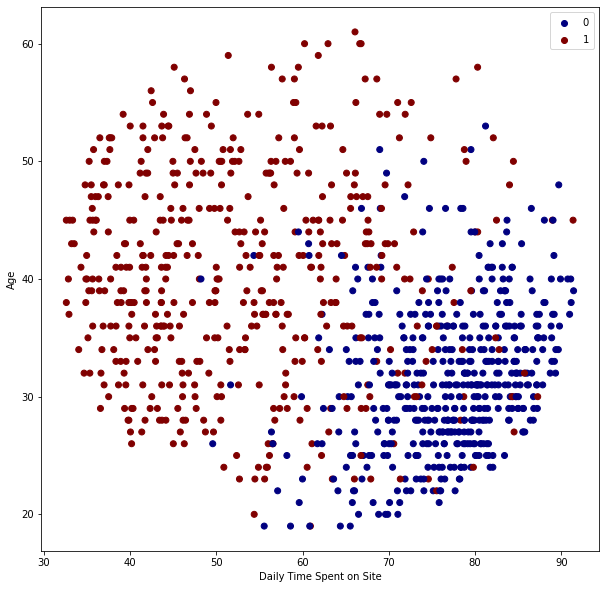

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

# 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income', 'Age'
feature1 = 'Daily Time Spent on Site'  
feature2 = 'Age'

p = ax.scatter(df[feature1], df[feature2], c=df['Clicked on Ad'], cmap=cm_bright)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.legend(*p.legend_elements(), loc='best')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

labels = df['Clicked on Ad']

X = np.array([df[feature1], df[feature2]]).T
print(X.shape)

X = StandardScaler().fit_transform(X)
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(1000, 2)


In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)) # Returns mean accuracy. Internally, it calculates the predictions, compares  
                                 # them to the labels, and measures how the percentage of predictions matching the labels. 
print(clf.predict(X_test[:3]))
print(clf.predict_proba(X_test[:3])) # Probabilities per class. Argmax on these value is what clf.predict calculates! 

0.92
[0 0 0]
[[0.93444243 0.06555757]
 [0.98019496 0.01980504]
 [0.69867489 0.30132511]]


(11020,)
(116, 95)


([], [])

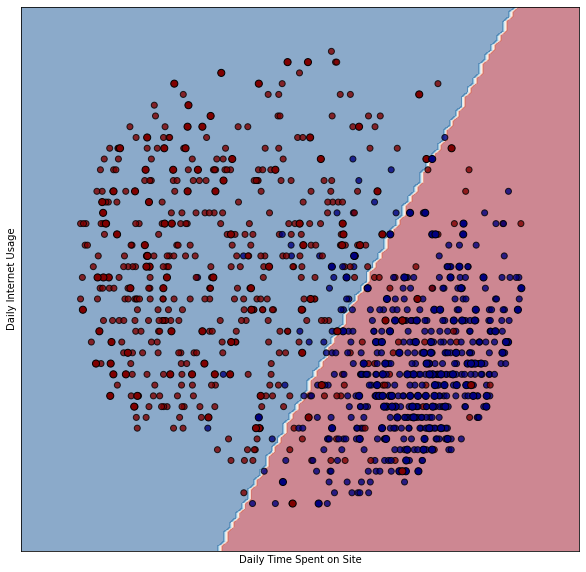

In [9]:
from matplotlib.colors import ListedColormap

h = .05  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].

f1_min, f1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
f2_min, f2_max = X[:, 1].min() - .5, X[:, 1].max() + .5

ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))
Z = clf.predict(np.c_[ff1.ravel(), ff2.ravel()])

# Put the result into a color plot
print(Z.shape)
Z = Z.reshape(ff1.shape)
print(Z.shape)

plt.figure(1, figsize=(10, 10))
# plt.pcolormesh(ff1, ff2, Z, cmap=cm, alpha=.5, shading='auto')
plt.contourf(ff1, ff2, Z, cmap=cm, alpha=.5) # contourf plots filled contours.

# plt.contour(ff1, ff2, Z, colors=['k'], linestyles=['--'], levels=[0.5])

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cm_bright, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=cm_bright, s=50)

plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')

plt.xlim(ff1.min(), ff1.max())
plt.ylim(ff2.min(), ff2.max())

plt.xticks(())
plt.yticks(())